<a href="https://colab.research.google.com/github/MuhammedEmirEren/PyTorch_Workflow/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Resources:
* https://www.learnpytorch.io/01_pytorch_workflow/

* https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb


In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build modeş",
                      3: "fitting the model to data (trainingn)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build modeş',
 3: 'fitting the model to data (trainingn)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
# https://pytorch.org/docs/stable/nn.html
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.1+cu121'

## 1.Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel speadsheet
* Images of any kinf
* Videos
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a geame of two parts:
1. Get data into a numerical representation
2. Build a model to  learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # Ideal output is ccreateed by us for now
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set wwith our data, validation set is not always used but training and test is always used.

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] # Normally, we should use randomness

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})



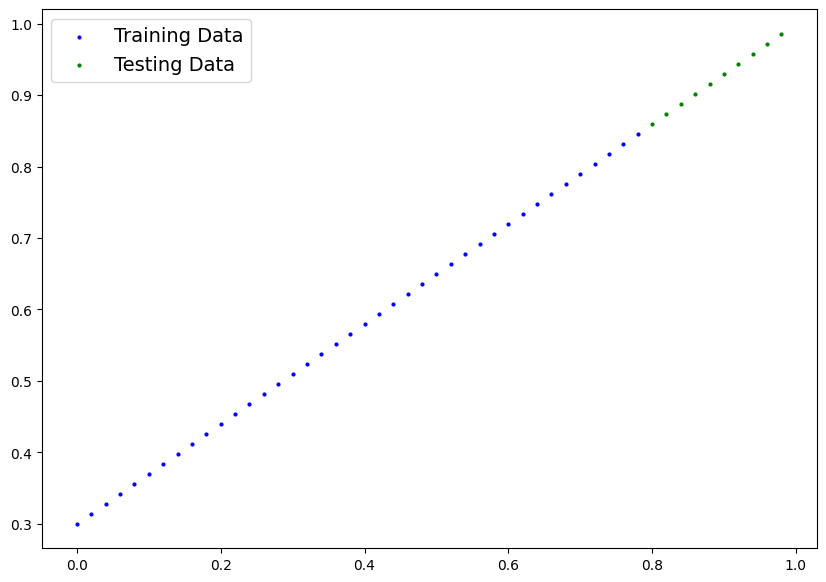

In [ ]:
plot_predictions()

## 2. Build Model

First PyTorch model

Python classes from real phyton: https://realpython.com/python3-object-oriented-programming/


What our model does:
* Start with random values (wweight and bias)
* Look at training data annd adjust the random values to better represent (or get closer to) ideal values (the weight and bias values we used to create the data)

How does it do so?
Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [ ]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module) # nn.Module in the parannthesis means inheritance ---
                                       # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # Default is true
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <-- "x" is the input data with the required type torch.Tensor, return type is torch.Tensor
       return self.weights * x + self.bias # This is the linear regression formula




### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (aa neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural network modulesi if you subclass it, you should override forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses reqire you to override forward() method, this method defines what happens in the forward computation